In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from pandas.tools.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split

%matplotlib inline

In [230]:
df = pd.read_csv('data/churn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [5]:
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


## Cleaning up Data

In [231]:
## converted dates to readable format
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [232]:
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [233]:
# converted cities to dummy cols

dummies = pd.get_dummies(df['city'])
df['Astapor'] = dummies['Astapor']
df["King's Landing"] = dummies["King's Landing"]
df['Winterfell'] = dummies['Winterfell']

In [234]:
# converted phone types to dummy cols

df[['Android', 'iPhone']] = pd.get_dummies(df['phone'])

In [235]:
# Created Churn Column / target variable

df['Churn'] = df['last_trip_date'] < pd.to_datetime('2014-06-01')

In [236]:
# filled in missing values for ratings and phone type

df['avg_rating_of_driver'].fillna(value=4.900000, inplace=True)
df['avg_rating_by_driver'].fillna(value=5.000000, inplace=True)
df['phone'].fillna(value='iPhone', inplace=True)

In [237]:
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,King's Landing,Winterfell,Android,iPhone,Churn
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0,1,0,0,1,False
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1,0,0,1,0,True
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,0,0,0,1,True
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,0,1,0,0,1,False
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,0,1,1,0,True
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,0,0,1,0,1,False
6,3.95,4.0,4.9,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,1,0,0,1,0,True
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,0,0,1,0,1,True
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,0,0,1,1,0,True
9,2.37,5.0,4.9,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,0,0,1,1,0,True


In [240]:
temp = pd.to_datetime('2014-07-01') - df['last_trip_date']
df['days_since_last_trip'] = (temp / np.timedelta64(1, 'D')).astype(int)

In [242]:
temp = pd.to_datetime('2014-07-01') - df['signup_date']
df['days_since_signup'] = (temp / np.timedelta64(1, 'D')).astype(int)

In [243]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,King's Landing,Winterfell,Android,iPhone,Churn,days_since_last_trip,days_since_signup
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0,1,0,0,1,False,14,157
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1,0,0,1,0,True,57,153
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,0,0,0,1,True,175,176
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,0,1,0,0,1,False,2,172
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,0,1,1,0,True,108,155


In [315]:
Churn = df[df['Churn']==True]
NotChurn = df[df['Churn']==False]

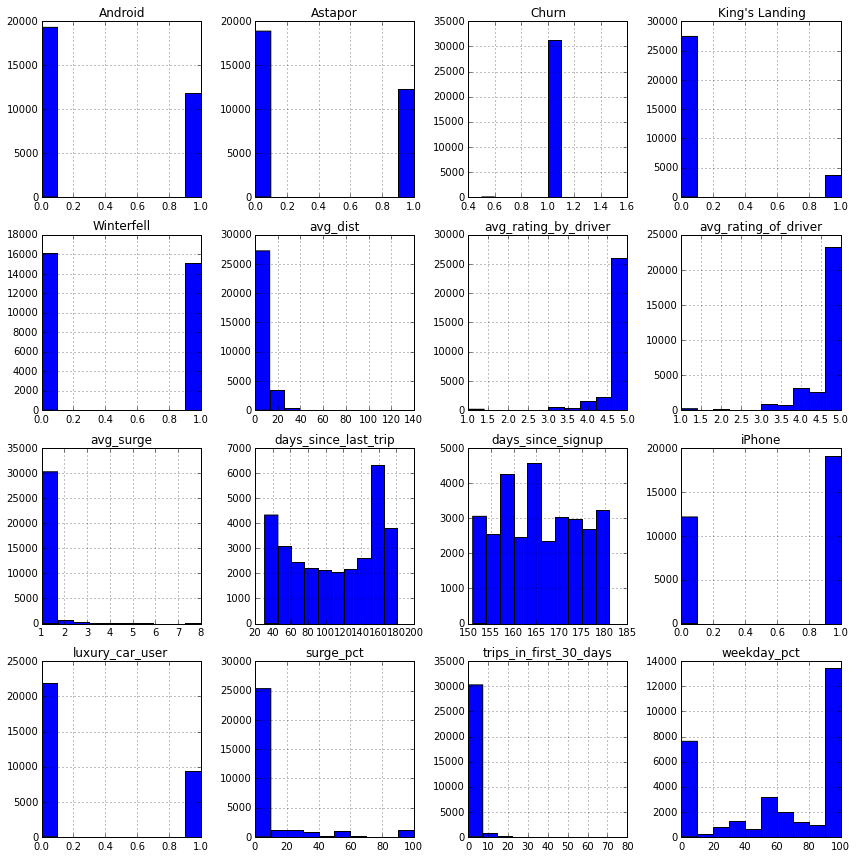

In [317]:
Churn.hist(figsize=(12,12))
plt.tight_layout()

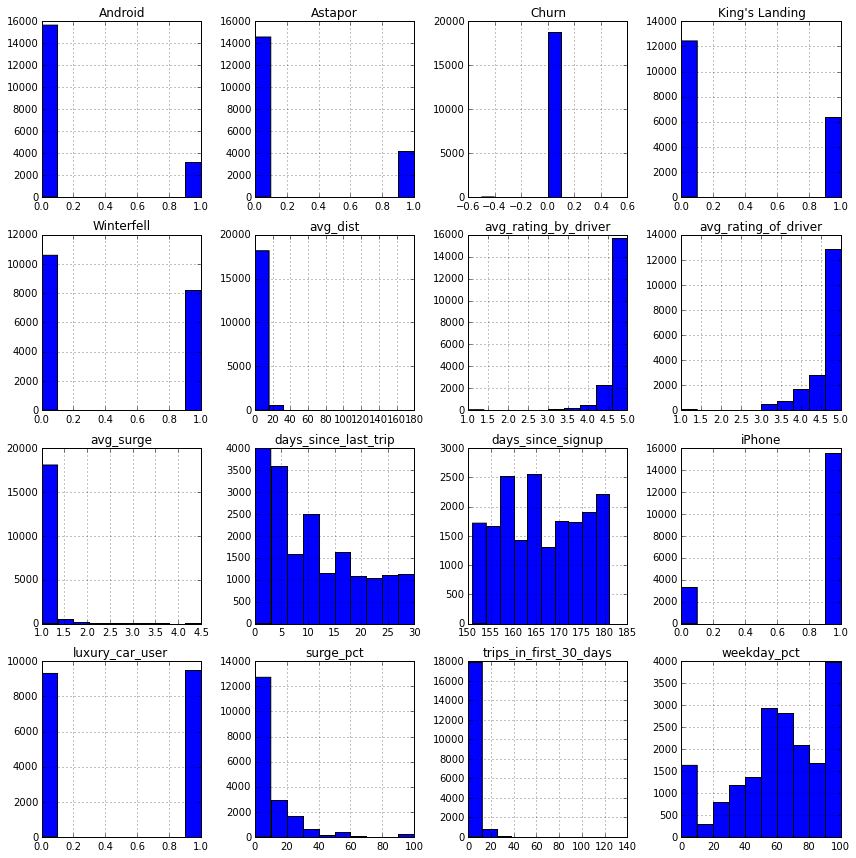

In [318]:
NotChurn.hist(figsize=(12,12))
plt.tight_layout()

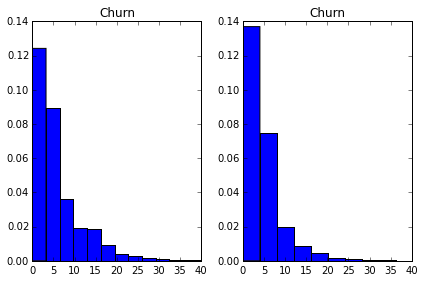

In [330]:
plt.subplot(1, 2, 1)
plt.hist(Churn['avg_dist'].values, bins=40, normed=1)
plt.title('Churn')
plt.xlim((0, 40))

plt.subplot(1, 2, 2)
plt.hist(NotChurn['avg_dist'].values, bins=40, normed=1)
plt.title('Churn')
plt.xlim((0, 40))

plt.tight_layout()

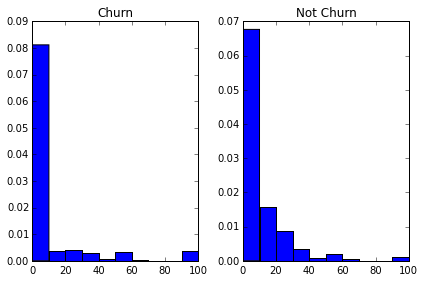

In [423]:
plt.subplot(1, 2, 1)
plt.hist(Churn['surge_pct'].values, bins=10, normed=1)
plt.title('Churn')

plt.subplot(1, 2, 2)
plt.hist(NotChurn['surge_pct'].values, bins=10, normed=1)
plt.title('Not Churn')

plt.tight_layout()

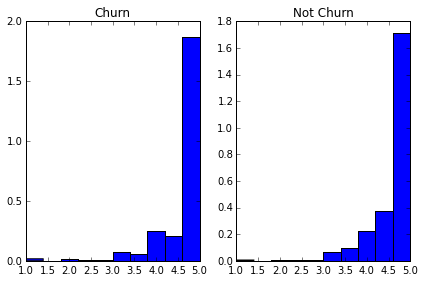

In [334]:
plt.subplot(1, 2, 1)
plt.hist(Churn['avg_rating_of_driver'].values, normed=1)
plt.title('Churn')


plt.subplot(1, 2, 2)
plt.hist(NotChurn['avg_rating_of_driver'].values, normed=1)
plt.title('Not Churn')


plt.tight_layout()

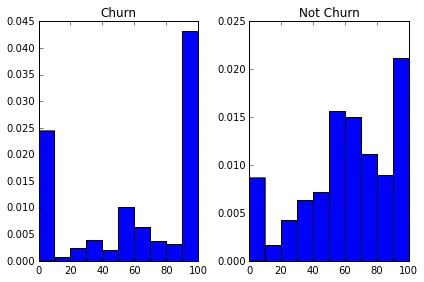

In [387]:
plt.subplot(1, 2, 1)
plt.hist(Churn['weekday_pct'].values, normed=1)
plt.title('Churn')


plt.subplot(1, 2, 2)
plt.hist(NotChurn['weekday_pct'].values, normed=1)
plt.title('Not Churn')

plt.tight_layout()

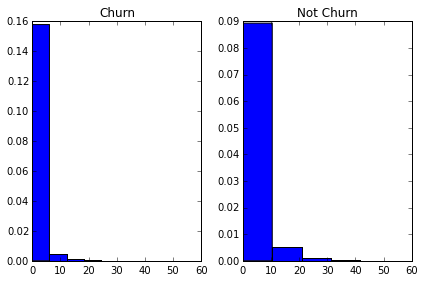

In [345]:
plt.subplot(1, 2, 1)
plt.hist(Churn['trips_in_first_30_days'].values, bins=12, normed=1)
plt.title('Churn')
plt.xlim((0, 60))


plt.subplot(1, 2, 2)
plt.hist(NotChurn['trips_in_first_30_days'].values, bins=12, normed=1)
plt.title('Not Churn')
plt.xlim((0, 60))


plt.tight_layout()

# Random Forest

In [249]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, max_features='auto', max_leaf_nodes=None, bootstrap=True, n_jobs=1, random_state=None)

In [136]:
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,King's Landing,Winterfell,Android,iPhone,days since signup
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0,1,0,0,1,143
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1,0,0,1,0,96
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,0,0,0,1,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,0,1,0,0,1,170
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,0,1,1,0,47
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,0,0,1,0,1,148
6,3.95,4.0,4.9,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,1,0,0,1,0,1
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,0,0,1,0,1,1
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,0,0,1,1,0,11
9,2.37,5.0,4.9,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,0,0,1,1,0,2


In [337]:
y = df['Churn']
X = df.drop(['city', 'phone', 'signup_date', 'last_trip_date', 'Churn', 'days_since_last_trip', 'days_since_signup'], axis=1)

In [338]:
rf.fit(X.values, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

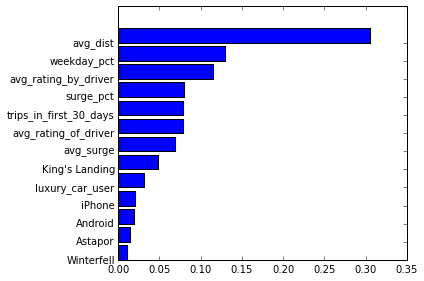

In [339]:
feature_importance(rf, X, y)

In [263]:
def feature_importance(model, dfX, dfy):
    fi = model.feature_importances_
    yticks = dfX.columns[np.argsort(fi)].values
    fi = sorted(fi)
    x = xrange(len(yticks))
    plt.barh(x, fi)
    plt.yticks(x, yticks)
    plt.tight_layout()
    

#Logistic Regression

In [270]:
lin_X = df.drop(['city', 'phone', 'signup_date', 'last_trip_date', 'Churn', 'days_since_last_trip', 'Winterfell', "iPhone"], axis=1)
lin_y = df['Churn']

In [296]:
lg= LogisticRegression(fit_intercept=True)

In [298]:
result = lg.fit(lin_X.values, lin_y.values)


#logit = sm.Logit(data['admit'], data[train_cols])

# fit the model
#result = logit.fit()

In [299]:
result.coef_

array([[  3.60306996e-02,   1.66793737e-01,   1.37100318e-01,
          1.14610543e-01,  -3.32064179e-03,  -1.18817942e-01,
         -8.59521370e-01,   1.85314474e-04,   5.02625100e-01,
         -1.23018720e+00,   1.07356253e+00,  -4.99616649e-03]])

In [289]:
lin_X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,King's Landing,Android,days_since_signup
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,0,1,0,157
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,1,0,1,153
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,1,0,0,176
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,0,1,0,172
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0,0,1,155


# Grid Search

In [ ]:
sklearn.grid_search.GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score='raise')

In [348]:
list(np.linspace(0, 30, 6))

[0.0, 6.0, 12.0, 18.0, 24.0, 30.0]

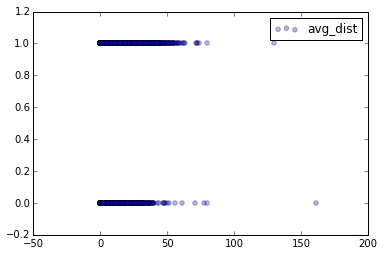

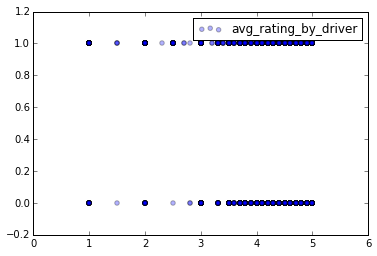

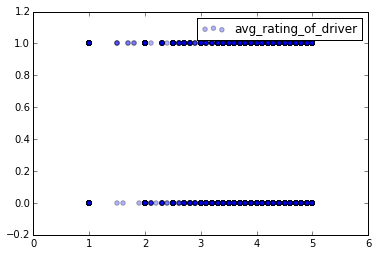

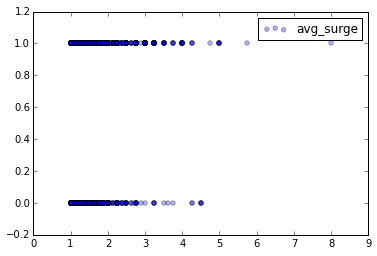

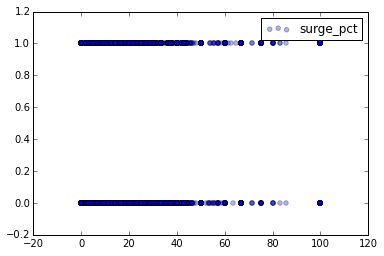

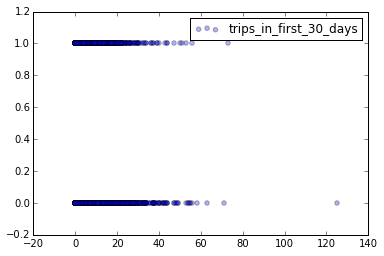

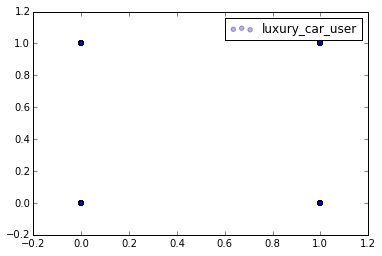

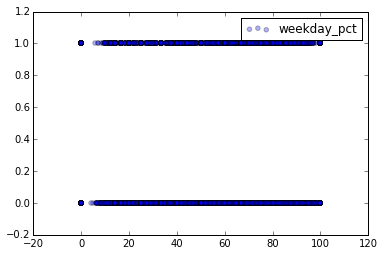

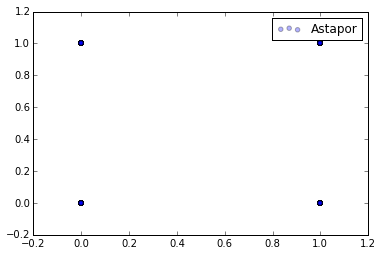

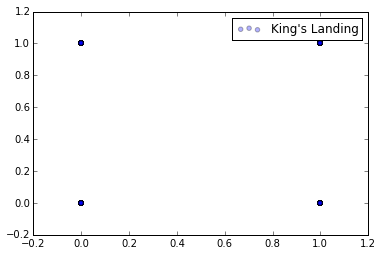

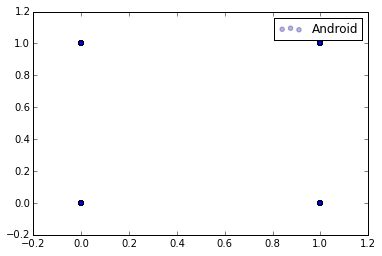

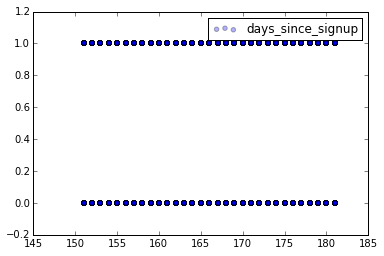

In [354]:
for i in lin_X.columns: 
    plt.scatter(x = lin_X[i], y = lin_y, label=i, alpha=0.3)
    plt.legend()
    plt.show()

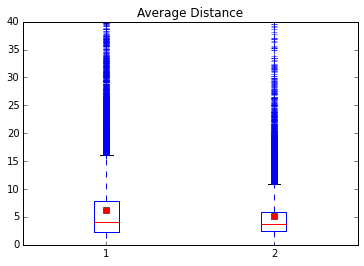

In [382]:
plt.boxplot([Churn['avg_dist'].values, NotChurn['avg_dist'].values], showmeans=True)
plt.ylim((0, 40))
plt.title('Average Distance')

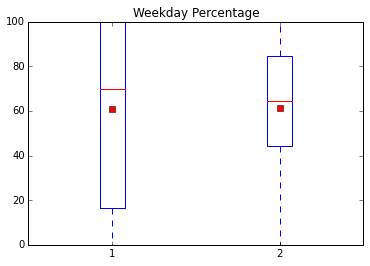

In [383]:
plt.boxplot([Churn['weekday_pct'].values, NotChurn['weekday_pct'].values], showmeans=True)
plt.title('Weekday Percentage')

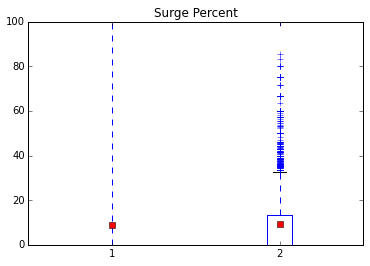

In [421]:
plt.boxplot([Churn['surge_pct'].values, NotChurn['surge_pct'].values], showmeans=True)
plt.title('Surge Percent')

(0, 40)

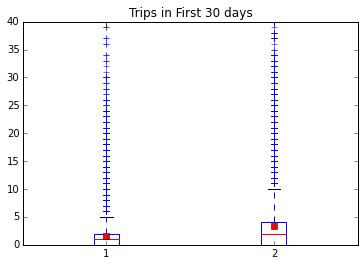

In [391]:
plt.boxplot([Churn['trips_in_first_30_days'].values, NotChurn['trips_in_first_30_days'].values], showmeans=True)
plt.title('Trips in First 30 days')
plt.ylim((0, 40))

In [365]:
np.linspace(1,100, 5)

array([   1.  ,   25.75,   50.5 ,   75.25,  100.  ])

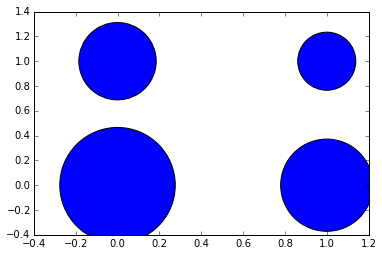

In [408]:
plt.scatter(x=[1,1,0,0], y=[1,0,1,0], s=[a_l, a_nl, i_l, i_nl])

In [403]:
c_a_l = np.sum (( Churn.Android == 1) & (Churn.luxury_car_user == 1))
c_a_nl = np.sum (( Churn.Android == 1) & (Churn.luxury_car_user == 0))
c_i_l = np.sum (( Churn.Android == 0) & (Churn.luxury_car_user == 1))
c_i_nl = np.sum (( Churn.Android == 0) & (Churn.luxury_car_user == 0))

In [409]:
nc_a_l = np.sum (( NotChurn.Android == 1) & (NotChurn.luxury_car_user == 1))
nc_a_nl = np.sum (( NotChurn.Android == 1) & (NotChurn.luxury_car_user == 0))
nc_i_l = np.sum (( NotChurn.Android == 0) & (NotChurn.luxury_car_user == 1))
nc_i_nl = np.sum (( NotChurn.Android == 0) & (NotChurn.luxury_car_user == 0))

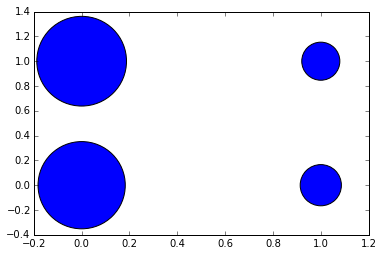

In [410]:
plt.scatter(x=[1,1,0,0], y=[1,0,1,0], s=[nc_a_l, nc_a_nl, nc_i_l, nc_i_nl])

In [ ]:
nc_a_l = np.sum (( NotChurn.Android == 1) & (NotChurn.luxury_car_user == 1))


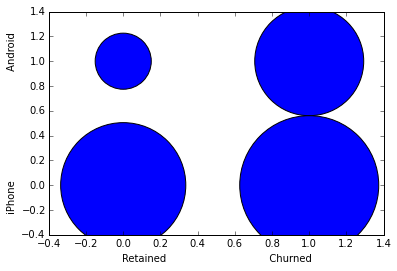

In [420]:
plt.scatter(x=[1,0,0,1], y=[1,1,0,0], s=[Churn.Android.sum(), NotChurn.Android.sum(), \
    (NotChurn.Android==0).sum(), (Churn.Android==0).sum()])
plt.xlabel('Retained                                 Churned')
plt.ylabel('iPhone                                   Android')

In [416]:
Churn.Android.sum()

11876.0